<a href="https://colab.research.google.com/github/maggieliuzzi/reinforcement_learning/blob/master/explore_exploit_dilemma/EpsilonGreedy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import print_function, division  # sudo pip install -U future
from builtins import range
import matplotlib.pyplot as plt
import numpy as np

In [0]:
NUM_TRIALS = 10000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

In [0]:
class Bandit:
  def __init__(self, p):
    # p: the win rate
    self.p = p
    self.p_estimate = 0.5
    self.N = 0  # number of samples

  def pull(self):
    # draw a 1 with probability p
    return np.random.random() < self.p

  def update(self, x):
    self.N += 1
    self.p_estimate = (x + self.p_estimate) / self.N

In [0]:
bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

In [42]:
rewards = np.zeros(NUM_TRIALS)
num_times_explored = 0
num_times_exploited = 0
num_optimal = 0
optimal_j = np.argmax([b.p for b in bandits])
print("optimal j:", optimal_j)

optimal j: 2


In [43]:
[b.p_estimate for b in bandits]

[0.5, 0.5, 0.5]

In [44]:
for i in range(NUM_TRIALS):

  # use epsilon-greedy to select the next bandit
  if np.random.random() < EPS:
    num_times_explored += 1
    print("Exploring: ", np.random.randint(0,3))
    j = bandits[np.random.randint(0,3)].pull()
  else:
    num_times_exploited += 1
    bandit_id = np.argmax([b.p_estimate for b in bandits])  # TOTHINK: argmax returns first occurrence if multiple
    print("Bandits: E(p): ", [b.p_estimate for b in bandits], ", chosen: ", bandit_id)
    j = bandits[bandit_id].pull()

  if j == optimal_j:
    num_optimal += 1

  # pull the arm for the bandit with the largest sample
  x = bandits[j].pull()

  # update rewards log
  rewards[i] = x

  # update the distribution for the bandit whose arm we just pulled
  bandits[j].update(x)

Streaming output truncated to the last 5000 lines.
Bandits: E(p):  [4.959335925083517e-07, 0.0002794076775827467, 0.5] , chosen:  2
Bandits: E(p):  [4.959335925083517e-07, 0.0002793296307393417, 0.5] , chosen:  2
Bandits: E(p):  [4.959335925083517e-07, 7.798147145151917e-08, 0.5] , chosen:  2
Bandits: E(p):  [4.959335925083517e-07, 0.0002790957515996292, 0.5] , chosen:  2
Bandits: E(p):  [4.959335925083517e-07, 7.787269854900368e-08, 0.5] , chosen:  2
Bandits: E(p):  [3.4875780063878456e-10, 7.787269854900368e-08, 0.5] , chosen:  2
Bandits: E(p):  [2.4508629700547053e-13, 7.787269854900368e-08, 0.5] , chosen:  2
Bandits: E(p):  [2.4508629700547053e-13, 2.1721812705440357e-11, 0.5] , chosen:  2
Bandits: E(p):  [2.4508629700547053e-13, 6.057393392481973e-15, 0.5] , chosen:  2
Bandits: E(p):  [2.4508629700547053e-13, 0.00027878449958182493, 0.5] , chosen:  2
Bandits: E(p):  [2.4508629700547053e-13, 7.769913589237039e-08, 0.5] , chosen:  2
Bandits: E(p):  [2.4508629700547053e-13, 0.0002786

In [45]:
## Stats
for b in bandits:
  print("mean estimate:", b.p_estimate)  # mean estimates for each bandit
print("total reward earned:", rewards.sum())
print("overall win rate:", rewards.sum() / NUM_TRIALS)
print("num_times_explored:", num_times_explored)
print("num_times_exploited:", num_times_exploited)
print("num times selected optimal bandit:", num_optimal)

mean estimate: 1.7295698880742758e-14
mean estimate: 0.00013810247466927182
mean estimate: 0.5
total reward earned: 4189.0
overall win rate: 0.4189
num_times_explored: 946
num_times_exploited: 9054
num times selected optimal bandit: 0


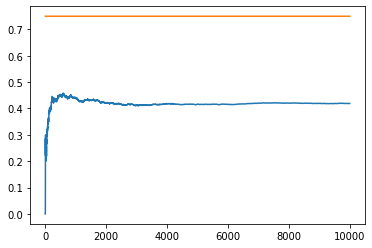

In [47]:
## Plots
cumulative_rewards = np.cumsum(rewards)
win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
plt.plot(win_rates)
plt.plot(np.ones(NUM_TRIALS) * np.max(BANDIT_PROBABILITIES))
plt.show()